In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.style.use('seaborn-darkgrid')

# import Walmart data
kalender = pd.read_csv('calendar.csv')
verkauf_train = pd.read_csv('sales_train_validation.csv')
preis = pd.read_csv('sell_prices.csv')

## Exploratory data analysis

### 1. Visualisation of the sales data

In [26]:
## sales_train_validation.csv is read into the variable verkauf_train
verkauf_per_cat = verkauf_train.groupby('cat_id').sum().T

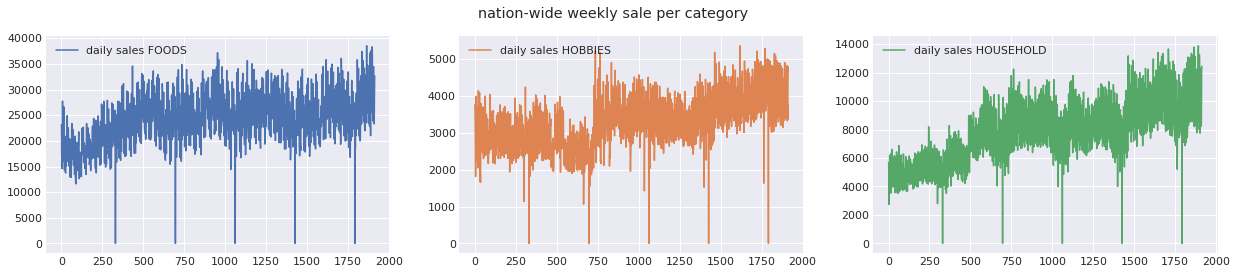

In [27]:
cmap = sns.color_palette()
fig, axs = plt.subplots(1,3, figsize=(21,4))
fig.suptitle('nation-wide weekly sale per category')
categories = ['FOODS','HOBBIES','HOUSEHOLD']
xindex = np.arange(0,verkauf_per_cat.shape[0])

for i, j in enumerate(categories):        
    axs[i].plot(xindex, verkauf_per_cat[j], color = cmap[i], label='daily sales '+j)
    axs[i].legend()

In [48]:
verkauf_per_state_cat = verkauf_train.groupby([verkauf_train['state_id'], verkauf_train['cat_id']]).sum().T

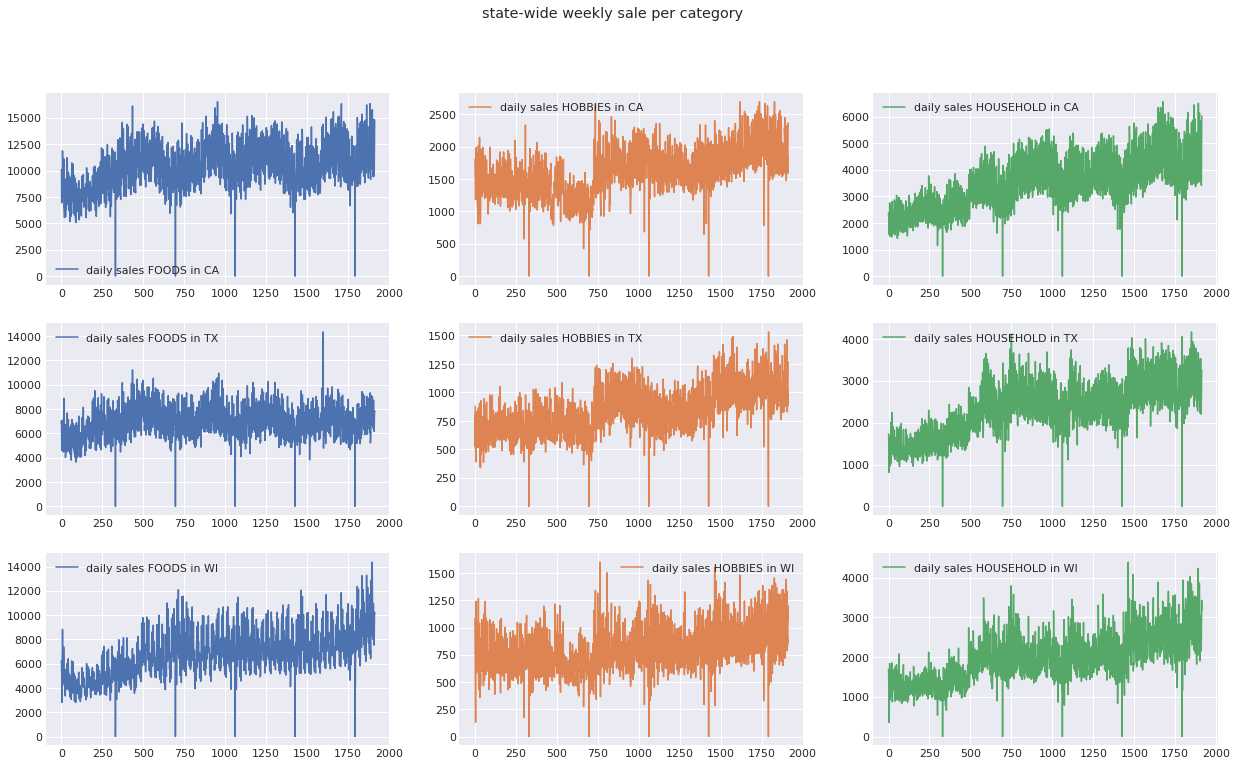

In [29]:
fig, axs = plt.subplots(3,3, figsize=(21,12))
fig.suptitle('state-wide weekly sale per category')
xindex = np.arange(0,verkauf_per_state_cat.shape[0])

for k,p in enumerate(states):
    for i, j in enumerate(categories):        
        axs[k,i].plot(xindex, verkauf_per_state_cat[p,j], color = cmap[i], label='daily sales '+j+' in '+p  )
        axs[k,i].legend()

### 2. Merge sell_price.csv and calender.csv

In [34]:
preis['category'] = preis['item_id'].str.split('_').str[0]
daily_price = pd.merge(preis, kalender, how = 'outer', on = 'wm_yr_wk')

In [35]:
daily_price['d'] = daily_price['d'].str.split('_').str[-1].astype('int32')

In [36]:
daily_price = daily_price.sort_values(by = ['d'])

In [37]:
tag_preis_kat_state = daily_price.groupby([daily_price['category'], daily_price['d']])['sell_price'].mean().unstack().T#.to_frame().reset_index()

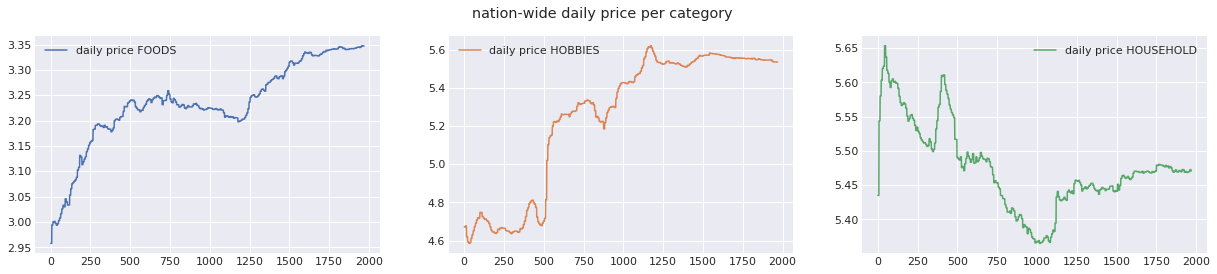

In [42]:
fig, axs = plt.subplots(1,3, figsize=(21,4))
fig.suptitle('nation-wide daily price per category')
xindex = np.arange(0,verkauf_per_state_cat.shape[0])


for i, j in enumerate(categories):        
    axs[i].plot(tag_preis_kat_state[j], color = cmap[i], label='daily price '+j  )
    axs[i].legend()

### 3. Plot time series of some individual products

In [51]:
products = verkauf_train.sample(15)

In [64]:
cin = np.append(3,np.arange(6,products.shape[1]))
sample_product_sales = products[products.columns[cin]]
sample_product_sales_food = sample_product_sales[sample_product_sales['cat_id']=='FOODS'].drop('cat_id', axis = 1).T

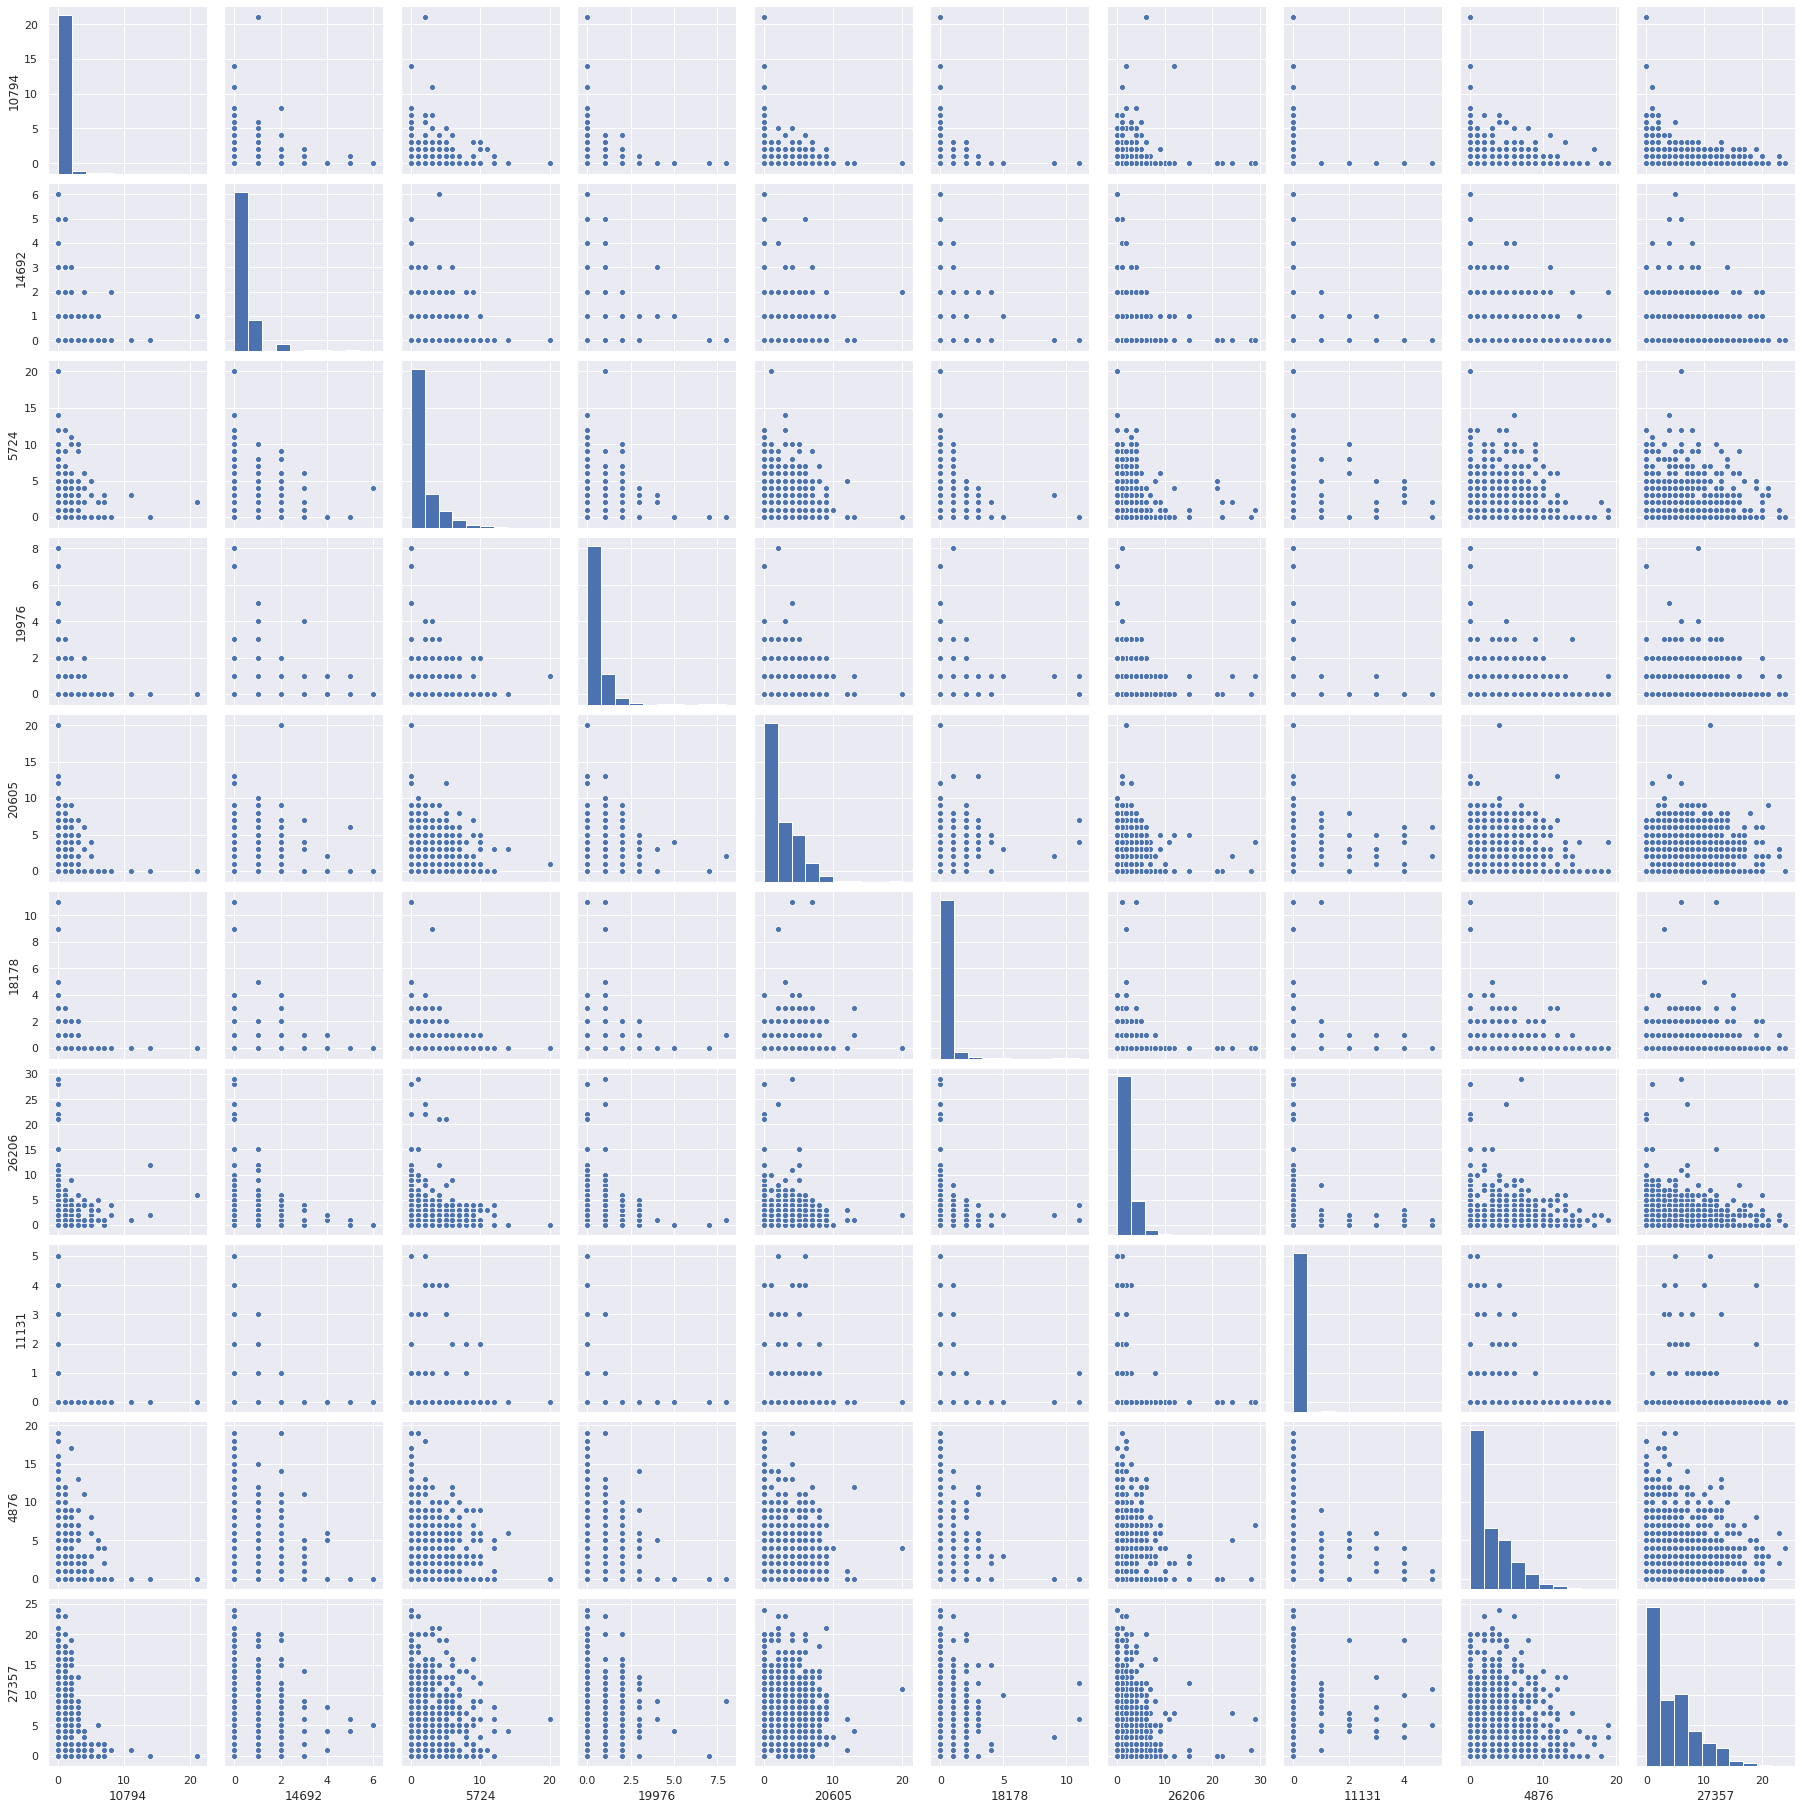

In [65]:
sns.set()
sns.pairplot(sample_product_sales_food, height=2.5)

In [66]:
sample_product_sales_food.corr()

,10794,14692,5724,19976,20605,18178,26206,11131,4876,27357
10794,1.000000,0.029745,0.014700,-0.050396,-0.090406,-0.053459,0.037488,-0.042315,-0.050788,-0.105947
14692,0.029745,1.000000,0.013593,0.002111,0.103152,0.009488,-0.067682,-0.021450,-0.007805,0.074206
5724,0.014700,0.013593,1.000000,-0.007996,0.019211,0.004445,-0.003136,0.063908,0.032900,0.026088
19976,-0.050396,0.002111,-0.007996,1.000000,0.064339,0.074115,0.007429,-0.026418,-0.040477,0.088628
20605,-0.090406,0.103152,0.019211,0.064339,1.000000,0.230775,-0.093118,0.076783,-0.049120,0.406273
18178,-0.053459,0.009488,0.004445,0.074115,0.230775,1.000000,-0.056601,0.040187,0.000215,0.198811
26206,0.037488,-0.067682,-0.003136,0.007429,-0.093118,-0.056601,1.000000,-0.025354,0.003232,-0.057570
11131,-0.042315,-0.021450,0.063908,-0.026418,0.076783,0.040187,-0.025354,1.000000,-0.008667,0.081684
4876,-0.050788,-0.007805,0.032900,-0.040477,-0.049120,0.000215,0.003232,-0.008667,1.000000,-0.048445
27357,-0.105947,0.074206,0.026088,0.088628,0.406273,0.198811,-0.057570,0.081684,-0.048445,1.000000


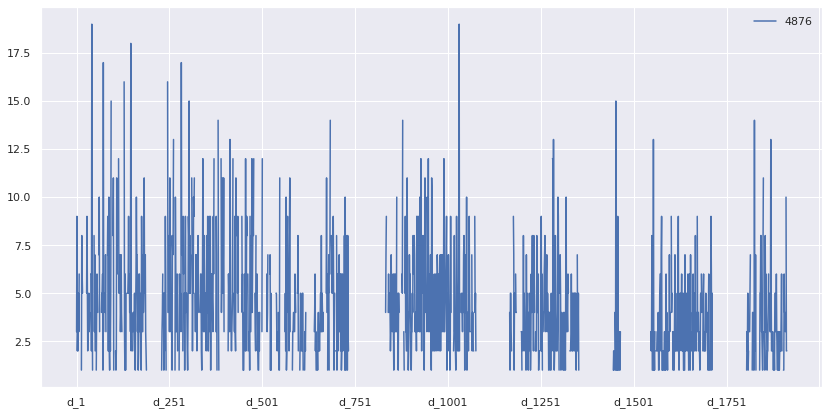

In [92]:
sample_product_sales_food.replace(0, np.nan, inplace=True)
sample_product_sales_food.iloc[:,8:9].plot(figsize = (14,7))